<h1>Desafio do Kaggle - Titanic</h1><br/><br/><em>Esse desafio tem como objetivo tentar prever se o pessoa sobreviveu o morreu no acidente ocorrido com base nos dados fornecidos pela plataforma</em>

In [1]:
#Importação das bibliotecas

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

<h3><em>Importação das Bases de Dados</em></h3>

In [2]:
#Importação da Base de dados de treinamento 

train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#importação da base de dados de Teste

test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h3>Unindo as Bases de Dados</h3><br/><br/><em>Vamos unir as bases para podermos tranformar os dados com melhor propriedade</em>

In [4]:
#Criando a coluna treino com o valor de True

train['set_treino'] = True
train.shape

(891, 13)

In [5]:
#Criando a coluna treino com o valor de False

test['set_treino'] = False
test.shape

(418, 12)

In [6]:
#Criação da coluna Survived na tabela de test para igualar a contidade de colunas nas duas bases

test["Survived"] = 'NaN'

In [7]:
test['set_treino'] = False
test.shape

(418, 13)

In [8]:
#União das duas bases

titanic_full = train.append(test)

In [9]:
titanic_full.shape

(1309, 13)

In [10]:
titanic_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  set_treino   1309 non-null   bool   
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 134.2+ KB


In [11]:
titanic_full.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
set_treino        0
dtype: int64

<h3><em>Tratando os dados ausentes</em></h3>

In [12]:
titanic_full['Age'].fillna(titanic_full['Age'].median(), inplace=True)

In [13]:
titanic_full['Fare'].fillna(titanic_full['Fare'].median(), inplace=True)

In [14]:
titanic_full['Embarked'].fillna('S', inplace=True)

In [15]:
titanic_full['Cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [16]:
titanic_full['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

In [17]:
titanic_full['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [18]:
titanic_full['Pclass_cut'] = pd.cut(titanic_full['Pclass'],
                                  bins=[0.,1, 2,np.inf],
                                  labels= [1,2,3])

<AxesSubplot:>

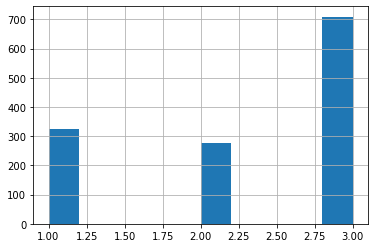

In [19]:
#Grafico de proporção de pessoas com que viajaram em quais classes

titanic_full["Pclass_cut"].hist()

In [20]:
#Proporção de homens no navio era bem maior

titanic_full['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [21]:
titanic_full.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
set_treino        0
Pclass_cut        0
dtype: int64

In [22]:
titanic_full.drop("Pclass_cut", axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set_treino
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,False
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,False
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False
416,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,False


In [23]:
titanic_hot_sex = titanic_full[["Sex"]]
titanic_hot_sex.head()

,Sex
0,male
1,female
2,female
3,female
4,male


<h3><em>Tratando os valores que não eram numericos na base</em></h3>

In [24]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
ordinal_encoder = OrdinalEncoder()

In [26]:
titanic_hot_encoder_sex = ordinal_encoder.fit_transform(titanic_hot_sex)

In [27]:
titanic_hot_encoder_sex[:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [28]:
coluna = ["Sex"]

In [29]:
titanic_sex = pd.DataFrame(data=titanic_hot_encoder_sex, columns=coluna)
titanic_sex.head()

,Sex
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [30]:
titanic_hot_embarked = titanic_full[["Embarked"]]
titanic_hot_embarked.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [31]:
titanic_hot_encoder_embarked = ordinal_encoder.fit_transform(titanic_hot_embarked)

In [32]:
titanic_hot_encoder_embarked[:10]

array([[2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.]])

In [33]:
coluna1 = ["Embarked"]

In [34]:
titanic_embarked = pd.DataFrame(titanic_hot_encoder_embarked,columns=coluna1)
titanic_embarked.head()

,Embarked
0,2.0
1,0.0
2,2.0
3,2.0
4,2.0


In [35]:
type(titanic_embarked)

pandas.core.frame.DataFrame

<h3><em>Adicionando o valores tratados como numeros a base de dados full</em></h3>

In [36]:
titanic_full['Sex'] = titanic_sex

In [37]:
titanic_full['Embarked'] = titanic_embarked

In [38]:
titanic_full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set_treino,Pclass_cut
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,2.0,True,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,0.0,True,1
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0,True,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,2.0,True,1
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,2.0,True,3


<h3><em>Excluindo os dados que não vamos usar da base</em></h3>

In [39]:
titanic_full = titanic_full.drop("Sex", axis=1)

In [40]:
titanic_full = titanic_full.drop("Cabin", axis=1)

In [41]:
titanic_full = titanic_full.drop("Embarked", axis=1)

In [42]:
titanic_full = titanic_full.drop("Name", axis=1)

In [43]:
titanic_full = titanic_full.drop("Ticket", axis=1)

In [44]:
titanic_full = titanic_full.drop("Pclass_cut", axis=1)

In [45]:
treino = titanic_full[titanic_full['set_treino'] == True]
treino.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,set_treino
0,1,0,3,22.0,1,0,7.2500,True
1,2,1,1,38.0,1,0,71.2833,True
2,3,1,3,26.0,0,0,7.9250,True
3,4,1,1,35.0,1,0,53.1000,True
4,5,0,3,35.0,0,0,8.0500,True


In [46]:
teste = titanic_full[titanic_full['set_treino'] == False]
teste.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,set_treino
0,892,NaN,3,34.5,0,0,7.8292,False
1,893,NaN,3,47.0,1,0,7.0000,False
2,894,NaN,2,62.0,0,0,9.6875,False
3,895,NaN,3,27.0,0,0,8.6625,False
4,896,NaN,3,22.0,1,1,12.2875,False


In [47]:
treino= treino.drop("set_treino", axis=1)

In [48]:
treino.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [49]:
teste= teste.drop("set_treino", axis=1)

In [50]:
teste.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,NaN,3,34.5,0,0,7.8292
1,893,NaN,3,47.0,1,0,7.0000
2,894,NaN,2,62.0,0,0,9.6875
3,895,NaN,3,27.0,0,0,8.6625
4,896,NaN,3,22.0,1,1,12.2875


In [51]:
treino_copy = treino.copy()

In [52]:
labels_treino = treino_copy["Survived"]

In [53]:
y = labels_treino

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
train_set, test_set = train_test_split(treino_copy, test_size=0.2, random_state=42)

In [56]:
len(train_set)

712

In [57]:
len(test_set)

179

<h3><em>Normalização dos dados para aplicação do algoritmo</em></h3>

In [58]:
treino_normal = (treino_copy - treino_copy.min())/(treino_copy.max()-treino_copy.min())
treino_normal.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,0.271174,0.125,0.0,0.014151
1,0.001124,1.0,0.0,0.472229,0.125,0.0,0.139136
2,0.002247,1.0,1.0,0.321438,0.0,0.0,0.015469
3,0.003371,1.0,0.0,0.434531,0.125,0.0,0.103644
4,0.004494,0.0,1.0,0.434531,0.0,0.0,0.015713


In [59]:
y = treino_normal['Survived']

In [60]:
treino_normal.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,0.271174,0.125,0.0,0.014151
1,0.001124,1.0,0.0,0.472229,0.125,0.0,0.139136
2,0.002247,1.0,1.0,0.321438,0.0,0.0,0.015469
3,0.003371,1.0,0.0,0.434531,0.125,0.0,0.103644
4,0.004494,0.0,1.0,0.434531,0.0,0.0,0.015713


In [61]:
y.shape

(891,)

In [62]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: object

In [63]:
treino_normal_copy=treino_normal.copy()

In [64]:
treino_normal_copy.drop("Survived", axis=1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.271174,0.125,0.0,0.014151
1,0.001124,0.0,0.472229,0.125,0.0,0.139136
2,0.002247,1.0,0.321438,0.0,0.0,0.015469
3,0.003371,0.0,0.434531,0.125,0.0,0.103644
4,0.004494,1.0,0.434531,0.0,0.0,0.015713
...,...,...,...,...,...,...
886,0.995506,0.5,0.334004,0.0,0.0,0.025374
887,0.996629,0.0,0.233476,0.0,0.0,0.058556
888,0.997753,1.0,0.346569,0.125,0.333333,0.045771
889,0.998876,0.0,0.321438,0.0,0.0,0.058556


In [65]:
X = treino_normal_copy

In [66]:
X = X.to_numpy()

In [67]:
X[:5]

array([[0.0, 0.0, 1.0, 0.2711736617240513, 0.125, 0.0,
        0.014151057562208049],
       [0.0011235955056179776, 1.0, 0.0, 0.4722292033174164, 0.125, 0.0,
        0.13913573538264068],
       [0.0022471910112359553, 1.0, 1.0, 0.32143754712239253, 0.0, 0.0,
        0.015468569817999833],
       [0.0033707865168539327, 1.0, 0.0, 0.43453128926866047, 0.125, 0.0,
        0.10364429745562033],
       [0.0044943820224719105, 0.0, 1.0, 0.43453128926866047, 0.0, 0.0,
        0.015712553569072387]], dtype=object)

In [68]:
X = X.astype(np.uint8)

In [69]:
y = y.astype(np.uint8)

In [70]:
y = y.to_numpy()

In [71]:
y[:5]

array([0, 1, 1, 1, 0], dtype=uint8)

In [72]:
y.shape

(891,)

In [73]:
X.shape

(891, 7)

<h3><em>Treinando os algoritmos</em</h3>

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
forest_clf = RandomForestClassifier()

In [76]:
forest_clf.fit(X,y)

RandomForestClassifier()

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
cross_val_score(forest_clf, X, y, cv=3, scoring='accuracy')

array([1., 1., 1.])

In [79]:
from sklearn.model_selection import cross_val_predict

In [80]:
y_train_pred = cross_val_predict(forest_clf, X, y, cv=3)

In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
confusion_matrix(y, y_train_pred)

array([[549,   0],
       [  0, 342]])

In [83]:
y_perfect_prediction = y

In [84]:
confusion_matrix(y, y_perfect_prediction)

array([[549,   0],
       [  0, 342]])

In [85]:
teste.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,NaN,3,34.5,0,0,7.8292
1,893,NaN,3,47.0,1,0,7.0000
2,894,NaN,2,62.0,0,0,9.6875
3,895,NaN,3,27.0,0,0,8.6625
4,896,NaN,3,22.0,1,1,12.2875


In [86]:
teste_copy=teste.copy()

In [87]:
teste_copy = teste_copy.drop("Survived", axis=1)

In [88]:
teste_normal = (teste_copy - teste_copy.min())/(teste_copy.max()-teste_copy.min())
teste_normal.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0.000000,1.0,0.452723,0.000,0.000000,0.015282
1,0.002398,1.0,0.617566,0.125,0.000000,0.013663
2,0.004796,0.5,0.815377,0.000,0.000000,0.018909
3,0.007194,1.0,0.353818,0.000,0.000000,0.016908
4,0.009592,1.0,0.287881,0.125,0.111111,0.023984


In [89]:
test_nu = teste_normal.to_numpy()

In [90]:
test_nu[:5]

array([[0.        , 1.        , 0.4527232 , 0.        , 0.        ,
        0.01528158],
       [0.00239808, 1.        , 0.61756561, 0.125     , 0.        ,
        0.01366309],
       [0.00479616, 0.5       , 0.8153765 , 0.        , 0.        ,
        0.01890874],
       [0.00719424, 1.        , 0.35381775, 0.        , 0.        ,
        0.01690807],
       [0.00959233, 1.        , 0.28788079, 0.125     , 0.11111111,
        0.0239836 ]])

<h3><strong><em>Separando em pedaços menores de dados</em></strong></h3>

In [118]:
treino_normal = treino_normal.astype(np.uint8)

In [120]:
treino_normal

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,1,1,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,0,0
887,1,0,0,0,0,0
888,0,1,0,0,0,0
889,1,0,0,0,0,0


In [136]:
from sklearn.model_selection import train_test_split

In [137]:
train_set, test_set = train_test_split(treino_normal, test_size=0.2, random_state=42)

In [138]:
len(train_set)

712

In [139]:
len(test_set)

179

In [140]:
train_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
331,0,0,0,0,0,0
733,0,0,0,0,0,0
382,0,1,0,0,0,0
704,0,1,0,0,0,0
813,0,1,0,0,0,0


In [141]:
y_train= train_set["Survived"]

In [142]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: uint8

In [143]:
X_train = train_set[["Pclass", "Age", "SibSp", "Parch", "Fare"]]
X_train.head()

,Pclass,Age,SibSp,Parch,Fare
331,0,0,0,0,0
733,0,0,0,0,0
382,1,0,0,0,0
704,1,0,0,0,0
813,1,0,0,0,0


In [144]:
X_train = X_train.astype(np.uint8)

In [145]:
X_train[:5]

,Pclass,Age,SibSp,Parch,Fare
331,0,0,0,0,0
733,0,0,0,0,0
382,1,0,0,0,0
704,1,0,0,0,0
813,1,0,0,0,0


In [146]:
y_train = y_train.to_numpy()

In [147]:
X_train = X_train.to_numpy()

In [148]:
forest = RandomForestClassifier()

In [149]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [150]:
test_set = test_set.astype(np.uint8)

In [152]:
y_test = test_set["Survived"]

In [153]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: uint8

In [154]:
X_test = test_set[["Pclass", "Age", "SibSp", "Parch", "Fare"]]

In [155]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare
709,1,0,0,0,0
439,0,0,0,0,0
840,1,0,0,0,0
720,0,0,0,0,0
39,1,0,0,0,0


In [156]:
y_test = y_test.to_numpy()

In [157]:
X_test = X_test.to_numpy()

In [158]:
y_test[:5]

array([1, 0, 0, 1, 1], dtype=uint8)

In [159]:
X_test[:5]

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [161]:
predicao = forest.predict(X_test)

In [162]:
predicao[:5]

array([0, 1, 0, 1, 0], dtype=uint8)

<h3>Conjunto de teste</h3>

In [163]:
teste.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,NaN,3,34.5,0,0,7.8292
1,893,NaN,3,47.0,1,0,7.0000
2,894,NaN,2,62.0,0,0,9.6875
3,895,NaN,3,27.0,0,0,8.6625
4,896,NaN,3,22.0,1,1,12.2875


In [165]:
test_copy = teste.copy()

In [166]:
test_copy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,NaN,3,34.5,0,0,7.8292
1,893,NaN,3,47.0,1,0,7.0000
2,894,NaN,2,62.0,0,0,9.6875
3,895,NaN,3,27.0,0,0,8.6625
4,896,NaN,3,22.0,1,1,12.2875


In [167]:
test_copy= test_copy.drop("Survived", axis=1)

In [169]:
test_copy= test_copy.drop("PassengerId", axis=1)

In [170]:
test_copy.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875


In [171]:
teste_normal = (test_copy - test_copy.min())/(test_copy.max()-test_copy.min())
teste_normal.head()

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.452723,0.000,0.000000,0.015282
1,1.0,0.617566,0.125,0.000000,0.013663
2,0.5,0.815377,0.000,0.000000,0.018909
3,1.0,0.353818,0.000,0.000000,0.016908
4,1.0,0.287881,0.125,0.111111,0.023984


In [172]:
X_teste = teste_normal.astype(np.uint8)

In [173]:
X_teste.head()

,Pclass,Age,SibSp,Parch,Fare
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [174]:
X_teste_array = X_teste.to_numpy() 

In [175]:
X_teste_array[:5]

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [176]:
predicao_total = forest.predict(X_teste_array)

In [178]:
print(predicao_total)

[0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1
 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0
 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0
 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0
 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1
 1 0 0 0 1 0 0 1 0 0 0]


In [179]:
PassengerId = teste['PassengerId']

In [182]:
Survived = predicao_total

In [183]:
resultado = pd.DataFrame(Survived, PassengerId)

In [184]:
resultado.head(10)

,0
PassengerId,
892,0
893,0
894,1
895,0
896,0
897,0
898,0
899,1
900,0


In [187]:
resultado.to_csv('Titanic_kaggle.csv', index=True)

In [186]:
resultado.head()

,0
PassengerId,
892,0
893,0
894,1
895,0
896,0


In [191]:
sub = pd.Series(predicao_total, index=teste['PassengerId'], name="Survived")
sub.shape

(418,)

In [192]:
sub.to_csv("modelo_kaggle_forest1.csv", header=True)

In [197]:
from sklearn.svm import LinearSVR

In [198]:
svm_reg = LinearSVR()
svm_reg.fit(X_train, y_train)

LinearSVR()

In [199]:
predicao_svm = svm_reg.predict(X_test)

In [200]:
sub_svm= pd.Series(predicao_total, index=teste['PassengerId'], name="Survived")
sub_svm.shape

(418,)

In [201]:
sub_svm.to_csv("modelo_kaggle_svm1.csv", header=True)